In [1]:
import pandas as pd

In [11]:
dia = pd.read_csv("./datos/train.csv", index_col=0)
dia_test = pd.read_csv("./datos/test.csv", index_col=0)

### Let's investigate the data:

In [95]:
dia.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
7683,0.61,Ideal,E,VVS2,62.0,54.0,5.43,5.47,3.38,801.00
15133,0.40,Good,I,SI1,63.9,57.0,4.66,4.70,2.99,639.02
25117,1.01,Good,G,SI1,63.2,55.0,6.32,6.40,4.02,837.24
34806,0.53,Very Good,G,SI2,60.0,56.0,5.28,5.32,3.18,698.38
13382,0.30,Ideal,G,VVS1,62.1,56.0,4.35,4.28,2.68,699.76


In [96]:
dia.color.value_counts()

G    8421
E    7336
F    7186
H    6220
D    5110
I    4092
J    2090
Name: color, dtype: int64

#### "Color" of diamonds:

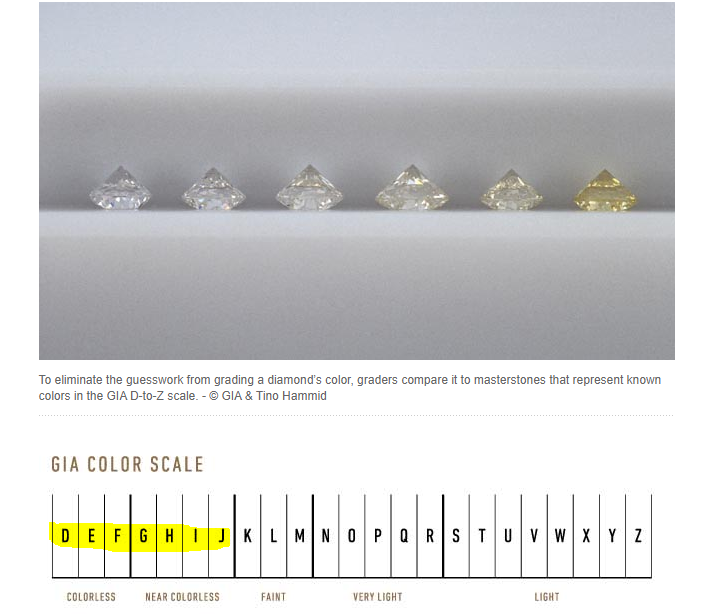

#### We can change that to a 1 to 7 scale:
- D = 7
- E = 6
- F = 5
- G = 4
- H = 3
- I = 2
- J = 1

In [5]:
dia.clarity.value_counts()

SI1     9736
VS2     9190
SI2     6933
VS1     6150
VVS2    3811
VVS1    2739
IF      1340
I1       556
Name: clarity, dtype: int64

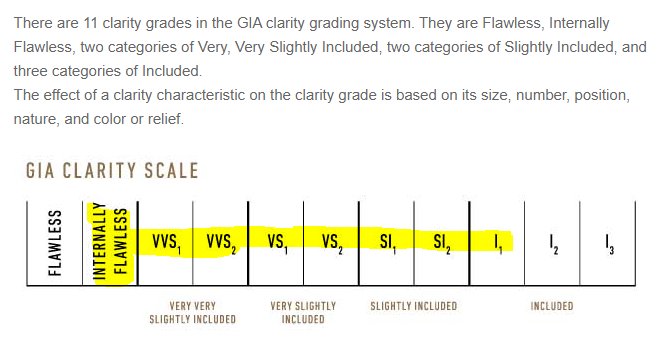

#### We can also give then a numeric rank from 1 to 8:
- Flawless = 11 
- Internally flawless = 10
- VVS1 = 9
- VVS2 = 8
- VS1 = 7
- VS2 = 6
- SI1 = 5
- SI2 = 4
- I1 = 3
- I2 = 2
- I3 = 1

In [7]:
dia.cut.value_counts()

Ideal        16177
Premium      10414
Very Good     9060
Good          3615
Fair          1189
Name: cut, dtype: int64

#### Also, the cut column that we can change to numbers between 1 to 5:
- Ideal = 5
- Premium = 4
- Very Good = 3
- Good = 2
- Fair = 1

### Let's start to change the columns and see the results:

In [103]:
def cleaning(df):
    
    dic_cut = {
    "Ideal": 5,
    "Premium": 4,
    "Very Good": 3,
    "Good": 2,
    "Fair": 1
}
    
    dic_color = {
    "D": 7,
    "E": 6,
    "F": 5,
    "G": 4,
    "H": 3,
    "I": 2,
    "J": 1
}
    
    dic_clarity = {
    "IF": 8,
    "VVS1": 7,
    "VVS2": 6,
    "VS1": 5,
    "VS2": 4,
    "SI1": 3,
    "SI2": 2,
    "I1": 1,
}
 

    new_df = df
    new_df = new_df.replace({"cut": dic_cut})
    new_df = new_df.replace({"color": dic_color})
    new_df = new_df.replace({"clarity": dic_clarity})

    return new_df

In [9]:
dic_cut = {
    "Ideal": 5,
    "Premium": 4,
    "Very Good": 3,
    "Good": 2,
    "Fair": 1
}

In [19]:
dic_color = {
    "D": 7,
    "E": 6,
    "F": 5,
    "G": 4,
    "H": 3,
    "I": 2,
    "J": 1
}

In [20]:
dic_clarity = {
    "IF": 8,
    "VVS1": 7,
    "VVS2": 6,
    "VS1": 5,
    "VS2": 4,
    "SI1": 3,
    "SI2": 2,
    "I1": 1,
}

In [34]:
new_dia = dia

In [36]:
new_dia = new_dia.replace({"cut": dic_cut})
new_dia = new_dia.replace({"color": dic_color})
new_dia = new_dia.replace({"clarity": dic_clarity})

In [33]:
new_dia.sample(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
30040,0.91,3,6,2,63.0,56.0,6.12,6.16,3.87,823.54
33098,0.32,4,3,4,60.7,58.0,4.43,4.46,2.70,622.46
3764,0.84,3,5,6,60.4,62.0,6.10,6.15,3.70,837.05


In [86]:
# X = new_dia.drop(["price", "cut", "color", "clarity"], axis=1)

X = new_dia.drop("price", axis=1)
X.sample(2)

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
26013,2.04,1,2,2,66.6,56.0,7.80,7.77,5.19
28818,1.50,5,2,1,61.3,57.0,7.36,7.39,4.52


In [87]:
y = new_dia["price"]
y.sample(2)

id
9959     877.94
28136    900.63
Name: price, dtype: float64

### Let's trian a Linear Regression model:

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

from sklearn import metrics

In [89]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(
    X = X_train,
    y = y_train
)

LinearRegression()

In [92]:
lr.predict(X_test)

array([741.96383412, 744.00322426, 707.48932426, ..., 792.98655098,
       835.87754206, 883.8523691 ])

In [93]:
y_test

id
30986    725.77
31640    748.77
3912     705.01
1652     603.79
15373    712.53
          ...  
32278    863.03
2138     849.92
39058    805.83
14821    818.12
12019    904.24
Name: price, Length: 8091, dtype: float64

In [94]:
y_pred = lr.predict(X_test)

In [95]:
data_test = pd.DataFrame(y_test)

In [96]:
data_test["pred"] = y_pred

In [97]:
data_test

,price,pred
id,,
30986,725.77,741.963834
31640,748.77,744.003224
3912,705.01,707.489324
1652,603.79,612.483773
15373,712.53,724.231148
...,...,...
32278,863.03,854.315827
2138,849.92,844.839291
39058,805.83,792.986551


#### Let's start keeping testing models MSE:

In [82]:
models_mse = []

In [ ]:
name = "LinReg No Cut, Color, Clarity"
mse = metrics.mean_squared_error(data_test.price, data_test.pred)

In [98]:
name = "LinReg"
mse = metrics.mean_squared_error(data_test.price, data_test.pred)

In [99]:
models_mse.append(
    {"Name": name,
    "MSE": mse}
)

In [100]:
models_mse

[{'Name': 'LinReg No Cut, Color, Clarity', 'MSE': 685.1554577272108},
 {'Name': 'LinReg', 'MSE': 315.9595973746593}]

### Let's do a Random Forest Regressor and Gradient Boosting Regressor:

#### Gradient Boosting Regressor:

In [150]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [151]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [154]:
gbr = GBR(criterion="mse", n_estimators=200)

In [155]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', n_estimators=200)

In [156]:
y_test_pred = gbr.predict(X_test)

In [157]:
name = "Gradient Boost Regressor - 200 estimatores"
mse = metrics.mean_squared_error(y_test, y_test_pred)

In [158]:
models_mse.append(
    {"Name": name,
    "MSE": mse}
)

#### Random Forest Regressor:

In [264]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [277]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [278]:
rfr = RFR(criterion="mse", n_estimators=2000)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000)

In [279]:
y_test_pred = rfr.predict(X_test)

In [280]:
name = "Random Forest Regressor - 2000 est"
mse = metrics.mean_squared_error(y_test, y_test_pred)

In [281]:
models_mse.append(
    {"Name": name,
    "MSE": mse}
)

In [282]:
models_mse

[{'Name': 'LinReg No Cut, Color, Clarity', 'MSE': 685.1554577272108},
 {'Name': 'LinReg', 'MSE': 315.9595973746593},
 {'Name': 'Gradient Boost Regressor', 'MSE': 117.55238777029855},
 {'Name': 'Random Forest Regressor', 'MSE': 83.03162542120319},
 {'Name': 'Gradient Boost Regressor - 200 estimatores',
  'MSE': 93.839098443372},
 {'Name': 'Random Forest Regressor - 300 estimators',
  'MSE': 80.68315732822991},
 {'Name': 'Random Forest Regressor - Grid', 'MSE': 106.92257307881725},
 {'Name': 'Random Forest Regressor - Grid 300', 'MSE': 107.01875628872027},
 {'Name': 'Random Forest Regressor - 1000 estimators',
  'MSE': 80.40425870650748},
 {'Name': 'SGDR', 'MSE': 77961077574346.38},
 {'Name': 'SGDR - 1000 iter', 'MSE': 6887294543864129.0},
 {'Name': 'Random Forest Regressor - 1000 estimators',
  'MSE': 83.44342891815896},
 {'Name': 'SGDR - 1000 iter', 'MSE': 1631964633646314.5},
 {'Name': 'Random Forest Regressor - 2000 est and bootstrap false',
  'MSE': 155.19836655314413},
 {'Name': 'R

#### Stockastic Descent Gradient Regressor:

In [250]:
from sklearn.linear_model import SGDRegressor as SGDR

In [251]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [252]:
sgdr = SGDR(max_iter=1000)
sgdr.fit(X_train, y_train)

SGDRegressor()

In [253]:
y_test_pred = sgdr.predict(X_test)

In [254]:
name = "SGDR - 1000 iter"
mse = metrics.mean_squared_error(y_test, y_test_pred)

models_mse.append(
    {"Name": name,
    "MSE": mse}
)

#### Grid search with Random Forest Regressor:

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
params = {'bootstrap': ['True', 'False'],
    'max_depth': [None],
    'max_features': ['auto', 'sqrt'],
    #'min_samples_leaf': [1, 5, 10],
    #'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 2000],
    'criterion': ["mse"]
}

In [258]:
rfr = RFR()

In [259]:
grid = GridSearchCV(rfr, params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['True', 'False'], 'criterion': ['mse'],
                         'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 400, 600, 800, 1000, 2000]},
             verbose=1)

In [260]:
print(grid.best_params_)

{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 2000}


#### Testing new RFR model:

In [319]:
rfr = RFR(criterion="mse", 
        n_estimators=1000,
        n_jobs=-1)
rfr.fit(X, y)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [245]:
# metrics.mean_squared_error(y_test, y_test_pred)

83.44342891815896

In [246]:
# name = "Random Forest Regressor - 1000 estimators"
# mse = metrics.mean_squared_error(y_test, y_test_pred)

In [247]:
models_mse.append(
    {"Name": name,
    "MSE": mse}
)

#### Testing xg boost:

In [285]:
import xgboost as xg

In [287]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [311]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                        n_estimators = 1000,
                        n_jobs = -1,
                        booster = "gbtree"
                   )

In [312]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [313]:
y_test_pred = xgb_r.predict(X_test)

In [314]:
name = "XGBoost - 1000 est, reg:squarederror, gbtree"
mse = metrics.mean_squared_error(y_test, y_test_pred)

models_mse.append(
    {"Name": name,
    "MSE": mse}
)

#### MSE list:

In [316]:
models_mse

[{'Name': 'LinReg No Cut, Color, Clarity', 'MSE': 685.1554577272108},
 {'Name': 'LinReg', 'MSE': 315.9595973746593},
 {'Name': 'Gradient Boost Regressor', 'MSE': 117.55238777029855},
 {'Name': 'Random Forest Regressor', 'MSE': 83.03162542120319},
 {'Name': 'Gradient Boost Regressor - 200 estimatores',
  'MSE': 93.839098443372},
 {'Name': 'Random Forest Regressor - 300 estimators',
  'MSE': 80.68315732822991},
 {'Name': 'Random Forest Regressor - Grid', 'MSE': 106.92257307881725},
 {'Name': 'Random Forest Regressor - Grid 300', 'MSE': 107.01875628872027},
 {'Name': 'Random Forest Regressor - 1000 estimators',
  'MSE': 80.40425870650748},
 {'Name': 'SGDR', 'MSE': 77961077574346.38},
 {'Name': 'SGDR - 1000 iter', 'MSE': 6887294543864129.0},
 {'Name': 'Random Forest Regressor - 1000 estimators',
  'MSE': 83.44342891815896},
 {'Name': 'SGDR - 1000 iter', 'MSE': 1631964633646314.5},
 {'Name': 'Random Forest Regressor - 2000 est and bootstrap false',
  'MSE': 155.19836655314413},
 {'Name': 'R

### Cargamos el nuevo dataset para predecir:

#### With a function:

In [242]:
def predict(model):
    df_to_test = pd.read_csv("./datos/test.csv", index_col=0)
    
    new_test = cleaning(df_to_test)
    
    new_test["price"] = model.predict(new_test)
    
    my_submission = new_test["price"]
    
    return my_submission

In [320]:
testing_rfr = predict(rfr)

In [321]:
testing_rfr.head(5)

id
0    763.39144
1    932.59315
2    856.19364
3    803.59739
4    882.36070
Name: price, dtype: float64

In [322]:
testing_rfr.to_csv("./datos/my_submission_day18_13hs41.csv")

#### Manually:

In [229]:
df_to_test = pd.read_csv("./datos/test.csv", index_col=0)

In [230]:
df_to_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.70,Very Good,H,SI1,61.0,58.0,5.67,5.70,3.47
1,1.52,Ideal,H,VS2,61.8,54.0,7.42,7.43,4.59
2,1.03,Ideal,E,SI1,62.0,57.0,6.44,6.47,4.00
3,0.70,Very Good,G,VVS1,63.3,57.0,5.59,5.63,3.55
4,1.28,Ideal,H,SI1,62.4,56.0,6.93,6.91,4.32
...,...,...,...,...,...,...,...,...,...
13480,0.42,Premium,H,VVS1,60.9,62.0,4.86,4.80,2.94
13481,0.71,Premium,F,VS1,62.2,58.0,5.72,5.66,3.54
13482,1.00,Premium,G,VS2,60.0,59.0,6.54,6.46,3.90


In [232]:
new_test = cleaning(df_to_test)

In [233]:
new_test.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
2317,1.50,1,2,1,66.1,57.0,7.12,7.04,4.68
7700,0.79,5,6,5,62.0,56.0,5.90,5.93,3.67
10259,2.01,5,2,3,62.4,54.0,8.04,7.96,5.00
10596,1.08,3,6,2,59.8,59.0,6.65,6.73,4.00
3536,1.03,1,1,2,56.2,62.0,6.73,6.69,3.77


In [234]:
sgdr.predict(new_test)

array([-3.46001478e+07, -2.68191522e+07, -1.03969584e+08, ...,
       -6.24472169e+07, -9.72053370e+07, -1.12716753e+08])

In [237]:
new_test["price"] = sgdr.predict(new_test)

In [238]:
new_test

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.70,3,3,3,61.0,58.0,5.67,5.70,3.47,-3.460015e+07
1,1.52,5,3,4,61.8,54.0,7.42,7.43,4.59,-2.681915e+07
2,1.03,5,6,3,62.0,57.0,6.44,6.47,4.00,-1.039696e+08
3,0.70,3,4,7,63.3,57.0,5.59,5.63,3.55,-1.135039e+08
4,1.28,5,3,3,62.4,56.0,6.93,6.91,4.32,-8.498746e+07
...,...,...,...,...,...,...,...,...,...,...
13480,0.42,4,3,7,60.9,62.0,4.86,4.80,2.94,-1.449560e+08
13481,0.71,4,5,5,62.2,58.0,5.72,5.66,3.54,-1.168099e+08
13482,1.00,4,4,4,60.0,59.0,6.54,6.46,3.90,-6.244722e+07


In [239]:
my_submission = new_test["price"]

In [240]:
my_submission.head(2)

id
0   -3.460015e+07
1   -2.681915e+07
Name: price, dtype: float64

In [241]:
my_submission.to_csv("./datos/my_submission_day18_10hs58.csv")